In [ ]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


In [ ]:
!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\h5py-2.10.0.dist-info\\AUTHORS'
Consider using the `--user` option or check the permissions.



Processing c:\users\uk15\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

In [3]:
df=pd.read_csv('forestfires.csv')

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [5]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [7]:
df.shape

(517, 31)

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [9]:
le=LabelEncoder()
ss=StandardScaler()

In [10]:
x=df.iloc[:,:11]
y=df['size_category']

In [11]:
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [12]:
y.value_counts()

small    378
large    139
Name: size_category, dtype: int64

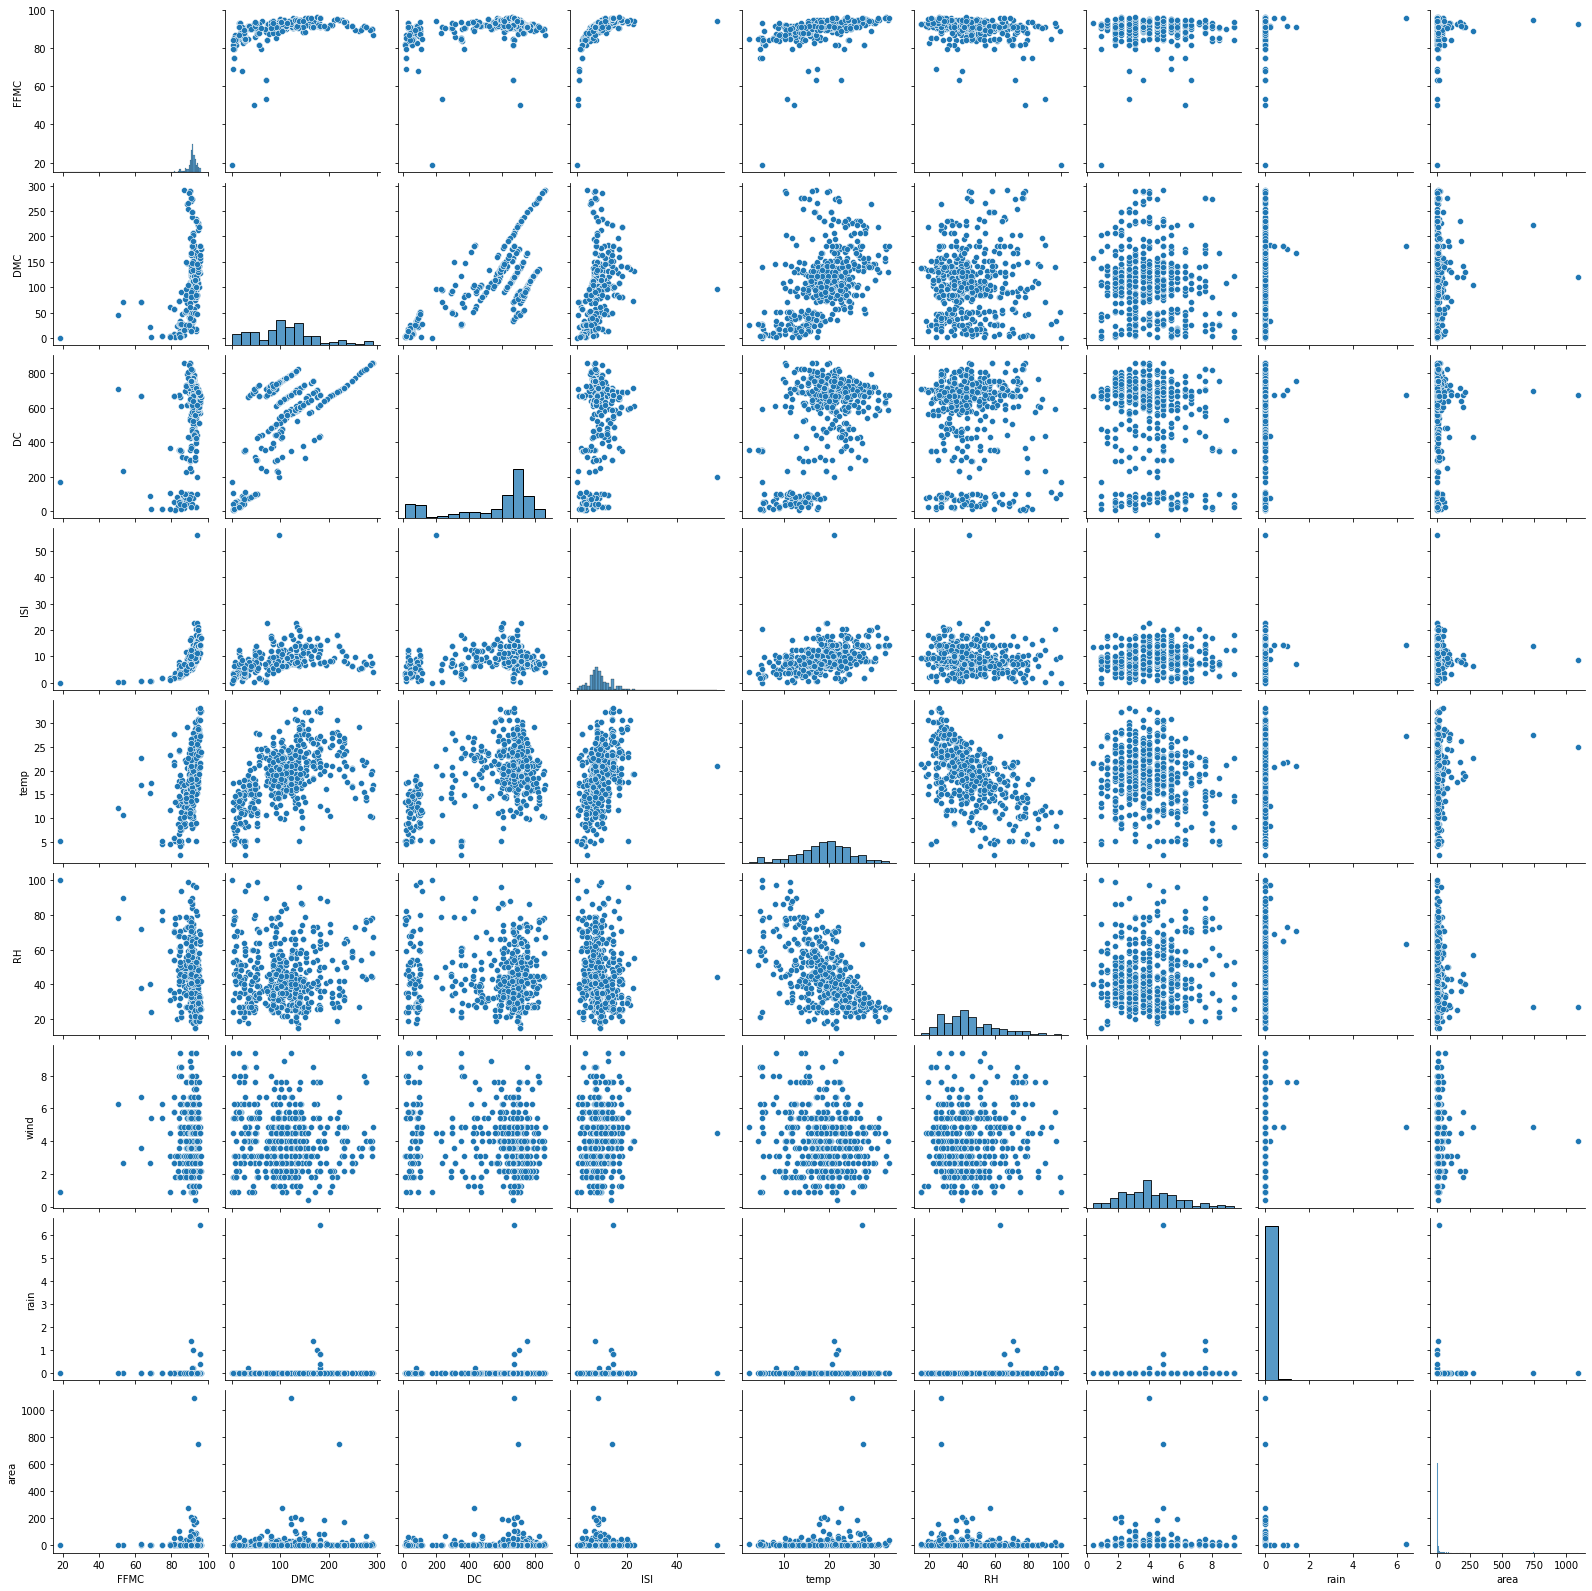

In [13]:
sns.pairplot(x)

In [14]:
cat=[col for col in x.columns if df[col].dtypes=='object']

In [15]:
num=[col for col in x.columns if df[col].dtypes=='int64' or df[col].dtypes=='float64']

In [16]:
cat,num

(['month', 'day'],
 ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])

In [17]:
for i in cat:
    x[i]=le.fit_transform(x[i])

In [18]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [19]:
y=np.where(y=='small',0,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [20]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


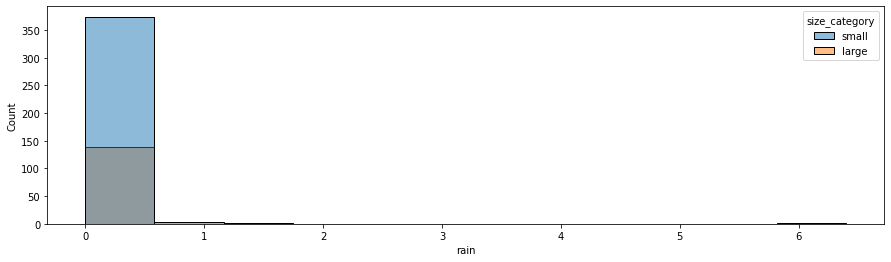

In [21]:
plt.figure(figsize=(15,4))
sns.histplot(x=df['rain'],hue =df['size_category'])


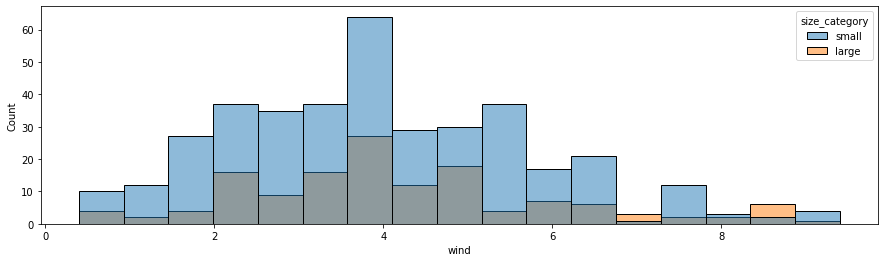

In [22]:
plt.figure(figsize=(15,4))
sns.histplot(x=df['wind'],hue =df['size_category'])


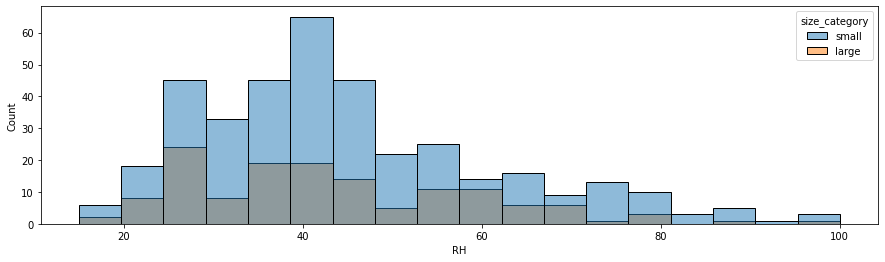

In [23]:
plt.figure(figsize=(15,4))
sns.histplot(x=df['RH'],hue =df['size_category'])


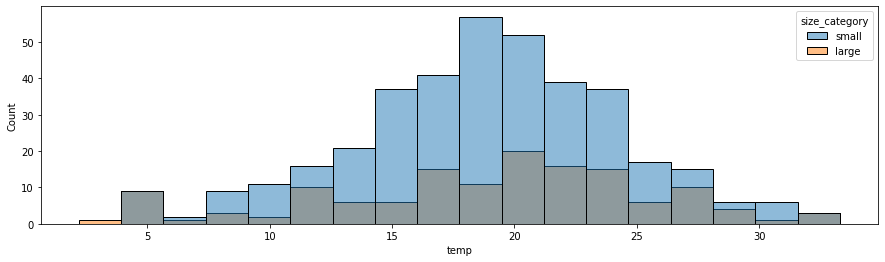

In [24]:
plt.figure(figsize=(15,4))
sns.histplot(x=df['temp'],hue =df['size_category'])


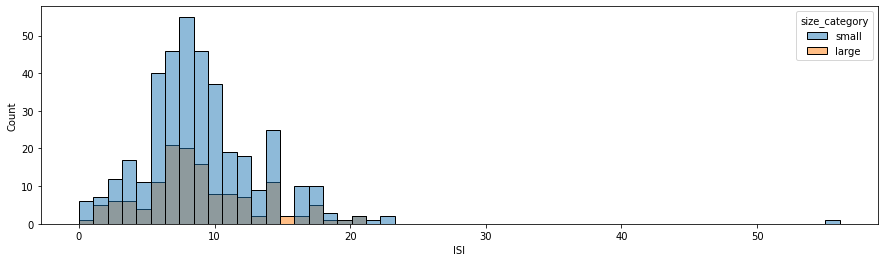

In [25]:
plt.figure(figsize=(15,4))
sns.histplot(x=df['ISI'],hue =df['size_category'])


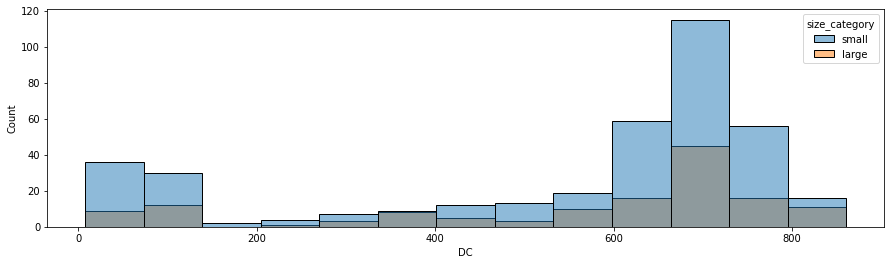

In [26]:
plt.figure(figsize=(15,4))
sns.histplot(x=df['DC'],hue =df['size_category'])


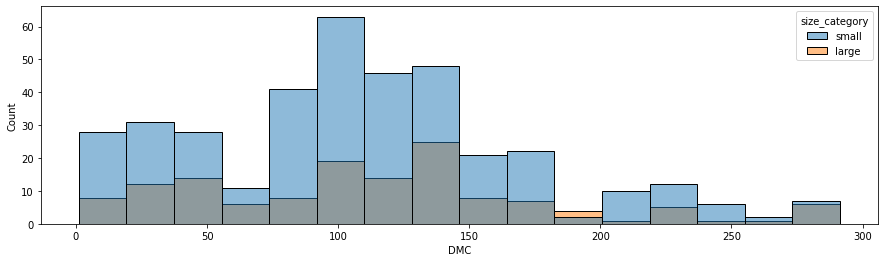

In [27]:
plt.figure(figsize=(15,4))
sns.histplot(x=df['DMC'],hue =df['size_category'])


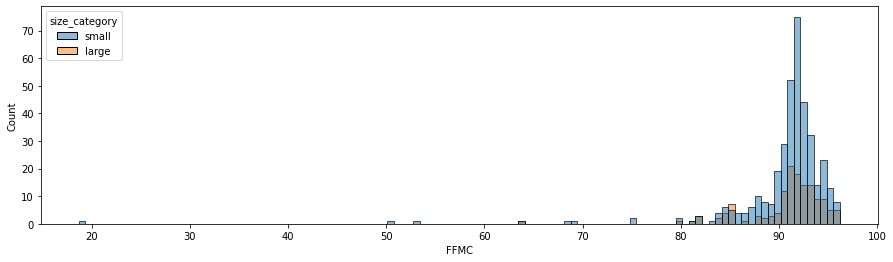

In [28]:
plt.figure(figsize=(15,4))
sns.histplot(x=df['FFMC'],hue =df['size_category'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


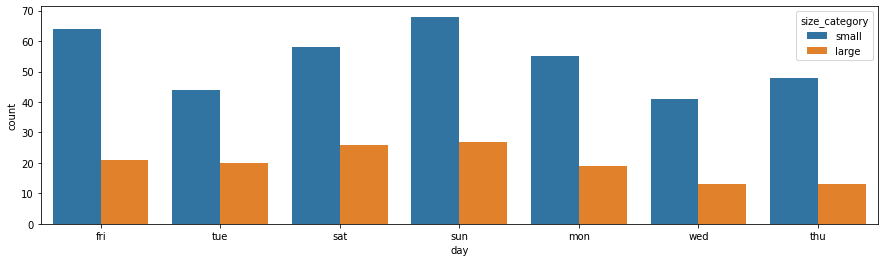

In [29]:
plt.figure(figsize=(15,4))
sns.countplot(df['day'],hue =df['size_category'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


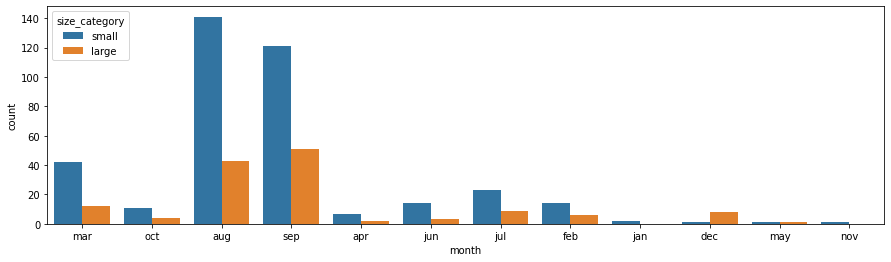

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(df['month'],hue =df['size_category'])


In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
model=MLPClassifier(hidden_layer_sizes=(100,))
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(ytest,ypred)

0.9615384615384616

In [35]:
confusion_matrix(ytest,ypred)

array([[73,  3],
       [ 1, 27]])

In [36]:
classification_report = classification_report(ytest,ypred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.90      0.96      0.93        28

    accuracy                           0.96       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.96      0.96      0.96       104



In [37]:
seed = 7
np.random.seed(seed)


In [41]:
model = Sequential()
model.add(Dense(12, input_dim=11,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [43]:
history= model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 11ms/step - loss: 0.6653 - accuracy: 0.7686 - val_loss: 0.6486 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7706 - val_loss: 0.6285 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7685 - val_loss: 0.6457 - val_accuracy: 0.6784
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5791 - accuracy: 0.7191 - val_loss: 0.6617 - val_accuracy: 0.6784
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5016 - accuracy: 0.7562 - val_loss: 0.5837 - val_accuracy: 0.6959
Epoch 6/150
35/35 [==============================] - 1s 16ms/step - loss: 0.4685 - accuracy: 0.7857 - val_loss: 0.5952 - val_accuracy: 0.7135
Epoch 7/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4410 - accuracy: 0.7963 - val_loss: 0.5436 - val_accuracy: 0.7427
Epoch 8/150

In [44]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 0.9903
accuracy: 99.03%


In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [47]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))\
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [48]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   1.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.981, total=   1.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.922, total=   1.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.922, total=   1.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.913, total=   1.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.990, total=   2.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.990, total=   2.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.951, total=   2.7s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.971, total=   2.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.922, total=   2.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=1.000, total=   4.6s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.990, total=   4.8s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.961, total=   4.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.951, total=   4.8s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.903, total=   4.7s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=1.000, total=   0.9s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.5min finished


In [51]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9728528738021851, using {'batch_size': 20, 'epochs': 50}
0.9476101517677307,0.035627511678341696 with: {'batch_size': 10, 'epochs': 10}
0.9650858879089356,0.02579681213647142 with: {'batch_size': 10, 'epochs': 50}
0.9611837267875671,0.03420392253648884 with: {'batch_size': 10, 'epochs': 100}
0.920556390285492,0.04649411702789216 with: {'batch_size': 20, 'epochs': 10}
0.9728528738021851,0.01672106185626138 with: {'batch_size': 20, 'epochs': 50}
0.9611837267875671,0.03420392253648884 with: {'batch_size': 20, 'epochs': 100}
0.8700522780418396,0.07959217224282329 with: {'batch_size': 40, 'epochs': 10}
0.9650858759880065,0.025040954371848948 with: {'batch_size': 40, 'epochs': 50}
0.9651232361793518,0.014585909035064503 with: {'batch_size': 40, 'epochs': 100}


In [53]:
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [54]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=1.000, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.750, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.534, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.680, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.709, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=1.000, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.6s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.750, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.4s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.524, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.835, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.816, total=   1.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.904, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.875, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.864, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.942, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.699, total=   0.9s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=1.000, total=   0.9s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   44.1s finished


In [55]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.887658703327179, using {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.734466016292572,0.15140339696325283 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7849514603614807,0.15417952645158414 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8567401051521302,0.08331296896365939 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7325242757797241,0.15178268966445949 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8548543691635132,0.08129292739569909 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.887658703327179,0.04545801419899085 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7401979088783264,0.1543622496550389 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8275392055511475,0.10727063926138475 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [56]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [57]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, init=uniform, score=0.000, total=   1.0s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.750, total=   0.9s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.524, total=   1.0s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.680, total=   1.1s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.699, total=   1.0s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=1.000, total=   1.0s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.0s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.750, total=   1.0s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.0s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.466, total=   1.0s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.9s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.680, total=   1.0s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.9s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.699, total=   1.0s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=1.000, total=   0.9s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.250, total=   0.9s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.524, total=   0.9s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.680, total=   0.9s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.699, total=   0.9s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=1.000, total=   1.8s
[CV] activation_function=relu, init=uniform .................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   59.1s finished


In [58]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7441747546195984, using {'activation_function': 'tanh', 'init': 'uniform'}
0.5305825233459472,0.2757845556417363 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7189320385456085,0.1708048178531471 with: {'activation_function': 'softmax', 'init': 'normal'}
0.6305825233459472,0.24482772813004766 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7441747546195984,0.14079008983424446 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7383495092391967,0.14272505266476487 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7441747546195984,0.14079008983424446 with: {'activation

In [60]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [61]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=1.000, total=   1.0s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.750, total=   1.0s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.544, total=   1.0s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.680, total=   1.0s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.709, total=   0.9s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=1.000, total=   0.9s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.8s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.750, total=   0.9s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.7s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.553, total=   1.9s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.680, total=   1.0s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.728, total=   1.0s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=1.000, total=   0.9s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.750, total=   0.9s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.563, total=   0.9s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.680, total=   0.9s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.718, total=   0.9s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=1.000, total=   0.9s
[CV] neuron1=8, neuron2=2 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   44.5s finished


In [62]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7577669978141784, using {'neuron1': 16, 'neuron2': 8}
0.7364077568054199,0.14886063535335176 with: {'neuron1': 4, 'neuron2': 2}
0.7422330021858216,0.14579602215256496 with: {'neuron1': 4, 'neuron2': 4}
0.7422330021858216,0.1435810475080406 with: {'neuron1': 4, 'neuron2': 8}
0.7441747546195984,0.14278448229340895 with: {'neuron1': 8, 'neuron2': 2}
0.75,0.13980245349365106 with: {'neuron1': 8, 'neuron2': 4}
0.7441747546195984,0.14119122224657613 with: {'neuron1': 8, 'neuron2': 8}
0.7558252334594726,0.1308664452537774 with: {'neuron1': 16, 'neuron2': 2}
0.7558252453804016,0.12927212570004917 with: {'neuron1': 16, 'neuron2': 4}
0.7577669978141784,0.1283280645292898 with: {'neuron1': 16, 'neuron2': 8}


In [63]:
from sklearn.metrics import classification_report, accuracy_score

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 11,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 11,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [64]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

ValueError: ignored